In [2]:
#import necessary libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import cv2
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [3]:
#load the FER-2013 dataset
data_path = 'fer2013'
train_dir = os.path.join(data_path, 'fer2013/train')
test_dir = os.path.join(data_path, 'fer2013/test')

In [4]:
img_shape = 48
batch_size = 64
train_data_path = 'fer2013/train/'
test_data_path = 'fer2013/test/'

In [5]:
# Define data augmentation parameters

train_datagen = ImageDataGenerator(
        rescale = 1 / 255.,
        # Data Augmentation
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,                                        
        fill_mode='nearest',
    )


test_datagen = ImageDataGenerator(
    rescale = 1 / 255.,
)



train_data = train_datagen.flow_from_directory(
    train_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size,
    subset='training', 
)


test_data = test_datagen.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size,
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
from keras.layers import BatchNormalization

def Create_CNN_Model():
    
    model = Sequential()
    
    #CNN1
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_shape, img_shape, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    
    #CNN2
    model.add(Conv2D(64, (3,3), activation='relu', ))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    
    #CNN3
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    
    
    #Output
    model.add(Flatten())
    
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(7,activation='softmax'))
    
    
    return model

In [7]:
CNN_Model = Create_CNN_Model()
CNN_Model.summary()
CNN_Model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Inmay\PycharmProjects\pythonProject\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 9, 9, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 9, 9, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 9, 9, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     6,554,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 7,837,895 (29.90 MB)

 Trainable params: 7,832,519 (29.88 MB)

 Non-trainable params: 5,376 (21.00 KB)

In [9]:
# Create Callback Checkpoint
checkpoint_path = "CNN_Model_Checkpoint.keras"

Checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True)

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(monitor = 'val_accuracy', patience = 15, restore_best_weights = True, verbose=1)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning rate
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss',
                                                  factor=0.2,
                                                  patience=2,
#                                                   min_lr=0.000005,
                                                  verbose=1)

callbacks = [Early_Stopping, Reducing_LR]

steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

In [11]:
CNN_history = CNN_Model.fit( train_data , validation_data= test_data , epochs=15, batch_size= batch_size,
                            callbacks=callbacks, steps_per_epoch= steps_per_epoch, validation_steps=validation_steps)

Epoch 1/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 72s 161ms/step - accuracy: 0.5174 - loss: 1.2858 - val_accuracy: 0.5523 - val_loss: 1.1651 - learning_rate: 0.0010
Epoch 2/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4531 - loss: 1.3134 - val_accuracy: 0.5566 - val_loss: 1.1624 - learning_rate: 0.0010
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 71s 158ms/step - accuracy: 0.5292 - loss: 1.2603 - val_accuracy: 0.5562 - val_loss: 1.1757 - learning_rate: 0.0010
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:10 159ms/step - accuracy: 0.5156 - loss: 1.2613
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5156 - loss: 1.2613 - val_accuracy: 0.5544 - val_loss: 1.1754 - learning_rate: 0.0010
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 71s 159ms/step - accuracy: 0.5622 - loss: 1.1960 - val_accuracy: 0.6013 - val_loss: 1.0525 - learning_rate: 2.0000e-04
Epoch 6/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5781 

In [12]:
CNN_Score = CNN_Model.evaluate(test_data)

print("    Test Loss: {:.5f}".format(CNN_Score[0]))
print("Test Accuracy: {:.2f}%".format(CNN_Score[1] * 100))



113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5549 - loss: 1.1426
    Test Loss: 1.00123
Test Accuracy: 62.12%


In [13]:
CNN_Score = CNN_Model.evaluate(train_data)

print("    Train Loss: {:.5f}".format(CNN_Score[0]))
print("Train Accuracy: {:.2f}%".format(CNN_Score[1] * 100))

449/449 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.6311 - loss: 0.9913
    Train Loss: 0.99553
Train Accuracy: 62.89%


In [14]:
def plot_curves(history):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.figure(figsize=(15,5))

    #plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()
    #plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()
  
  #plt.tight_layout()

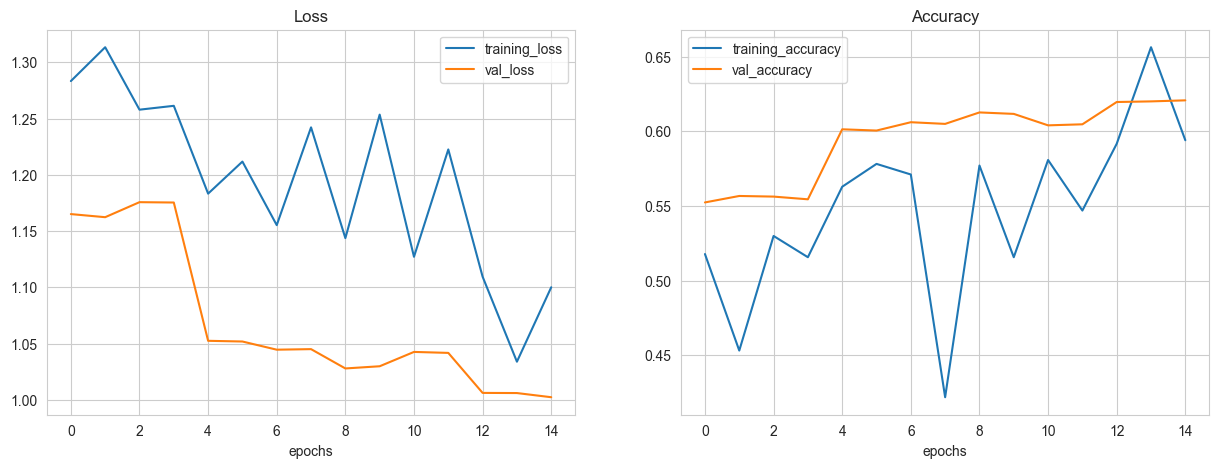

In [15]:
plot_curves(CNN_history)

In [16]:
CNN_Predictions = CNN_Model.predict(test_data)

# Choosing highest probalbilty class in every prediction 
CNN_Predictions = np.argmax(CNN_Predictions, axis=1)

113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step


In [17]:
test_data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

Text(0.5, 1.0, 'CNN Confusion Matrix')

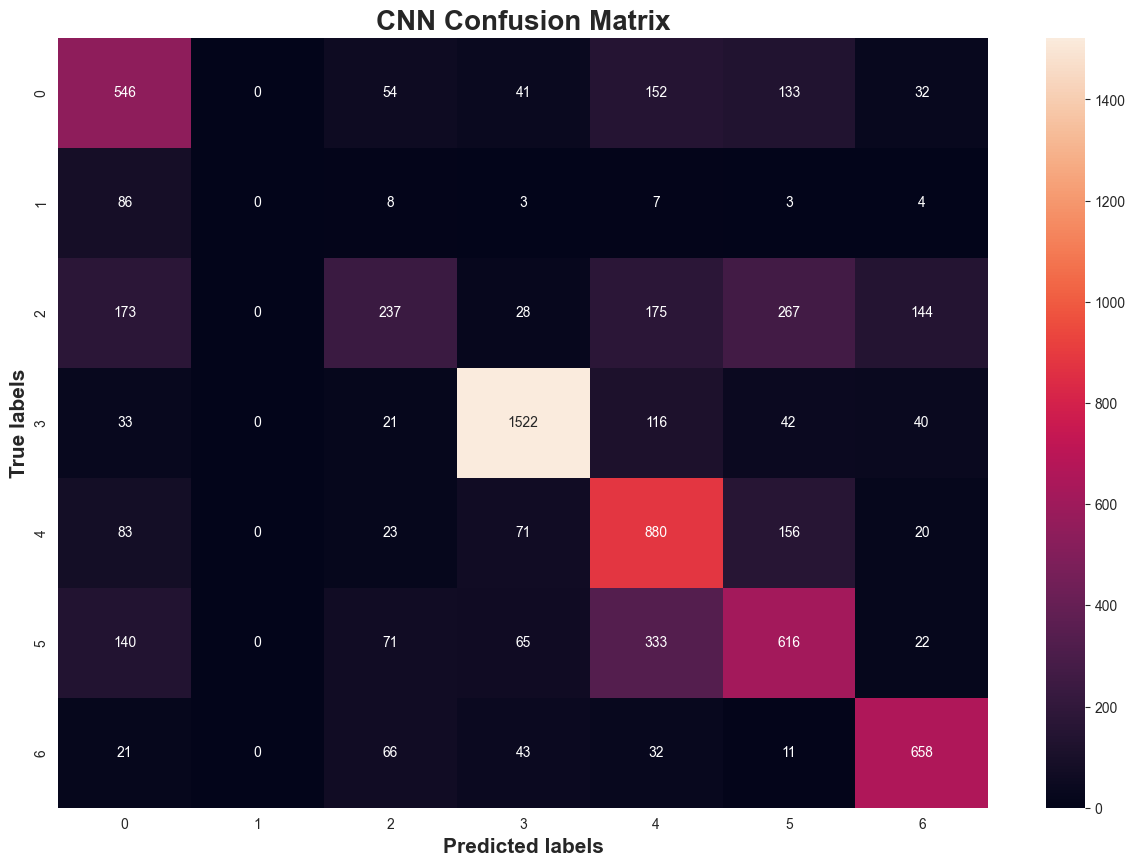

In [18]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

fig, ax= plt.subplots(figsize=(15,10))

cm=confusion_matrix(test_data.labels, CNN_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('CNN Confusion Matrix', fontsize=20, fontweight='bold')

In [19]:
# Print classification report and confusion matrix
print('Classification report:')
print(classification_report(test_data.labels, CNN_Predictions))

Classification report:
              precision    recall  f1-score   support

           0       0.50      0.57      0.54       958
           1       0.00      0.00      0.00       111
           2       0.49      0.23      0.32      1024
           3       0.86      0.86      0.86      1774
           4       0.52      0.71      0.60      1233
           5       0.50      0.49      0.50      1247
           6       0.72      0.79      0.75       831

    accuracy                           0.62      7178
   macro avg       0.51      0.52      0.51      7178
weighted avg       0.61      0.62      0.61      7178



C:\Users\Inmay\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Inmay\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Inmay\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [20]:
Emotion_Classes = ['Angry', 
                  'Disgust', 
                  'Fear', 
                  'Happy', 
                  'Neutral', 
                  'Sad', 
                  'Surprise']

In [21]:
# Shuffling Test Data to show diffrent classes
test_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
    )

test_generator = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size,
)

Found 7178 images belonging to 7 classes.


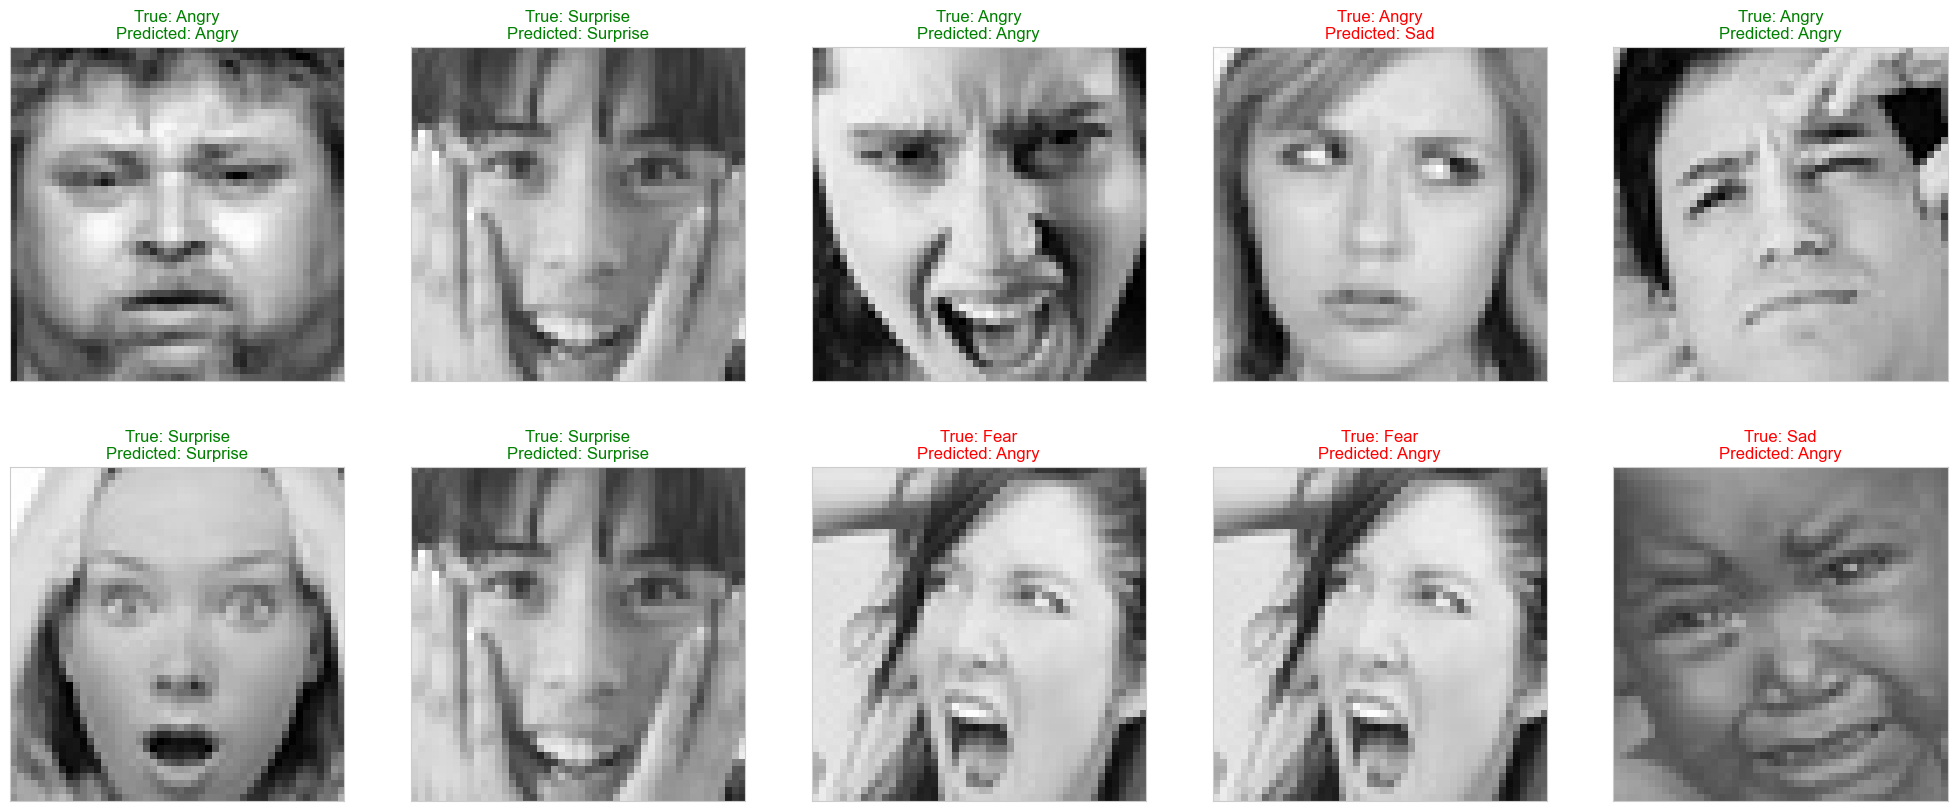

<Figure size 640x480 with 0 Axes>

In [22]:
# Display 10 random pictures from the dataset with their labels

Random_batch = np.random.randint(0, len(test_generator) - 1)

Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):

    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]

    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

    Model_Prediction = np.argmax(CNN_Model.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0))

    ax.imshow(Random_Img)

    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()

In [23]:
CNN_Model.save("CNN_Model.h5")

# ResNet50V2 Model

In [24]:
# specifing new image shape for resnet
img_shape = 224
batch_size = 64
train_data_path = 'fer2013/train'
test_data_path = 'fer2013/test'

In [25]:
train_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,                                        
        fill_mode='nearest',
    )


test_preprocessor = ImageDataGenerator(
    rescale = 1 / 255.,
)

train_data = train_preprocessor.flow_from_directory(
    train_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    subset='training', 
)

test_data = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size,
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [26]:
# Fine-Tuning ResNet50V2
# 224,224,3
ResNet50V2 = tf.keras.applications.ResNet50V2(input_shape=(224, 224, 3),
                                               include_top= False,
                                               weights='imagenet'
                                               )

#ResNet50V2.summary()

In [27]:
# Freezing all layers except last 50

ResNet50V2.trainable = True

for layer in ResNet50V2.layers[:-50]:
    layer.trainable = False

In [28]:
def Create_ResNet50V2_Model():

    model = Sequential([
                      ResNet50V2,
                      Dropout(.25),
                      BatchNormalization(),
                      Flatten(),
                      Dense(64, activation='relu'),
                      BatchNormalization(),
                      Dropout(.5),
                      Dense(7,activation='softmax')
                    ])
    return model

In [29]:
ResNet50V2_Model = Create_ResNet50V2_Model()

ResNet50V2_Model.summary()

ResNet50V2_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 7, 7, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 7, 7, 2048)     │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │     6,422,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,996,295 (114.43 MB)

 Trainable params: 22,779,527 (86.90 MB)

 Non-trainable params: 7,216,768 (27.53 MB)

In [31]:
# Create Callback Checkpoint
checkpoint_path = "ResNet50V2_Model_Checkpoint.keras"

Checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True)

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(monitor = 'val_accuracy', patience = 7, restore_best_weights = True, verbose=1)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                  factor=0.2,
                                                  patience=2,
#                                                   min_lr=0.00005,
                                                  verbose=1)

callbacks = [Early_Stopping, Reducing_LR]

steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

In [32]:
ResNet50V2_history = ResNet50V2_Model.fit(train_data ,validation_data = test_data , epochs=15, batch_size=batch_size,
                                         callbacks = callbacks, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

C:\Users\Inmay\PycharmProjects\pythonProject\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 604s 1s/step - accuracy: 0.4120 - loss: 1.7801 - val_accuracy: 0.5738 - val_loss: 1.2619 - learning_rate: 0.0010
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 8:35 1s/step - accuracy: 0.5000 - loss: 1.3080

C:\Users\Inmay\PycharmProjects\pythonProject\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


448/448 ━━━━━━━━━━━━━━━━━━━━ 78s 171ms/step - accuracy: 0.5000 - loss: 1.3080 - val_accuracy: 0.5760 - val_loss: 1.2573 - learning_rate: 0.0010
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 625s 1s/step - accuracy: 0.5648 - loss: 1.2029 - val_accuracy: 0.5950 - val_loss: 1.1293 - learning_rate: 0.0010
Epoch 4/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 84s 185ms/step - accuracy: 0.5781 - loss: 1.0981 - val_accuracy: 0.5943 - val_loss: 1.1294 - learning_rate: 0.0010
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 607s 1s/step - accuracy: 0.6084 - loss: 1.0850 - val_accuracy: 0.6073 - val_loss: 1.1028 - learning_rate: 0.0010
Epoch 6/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 78s 171ms/step - accuracy: 0.5469 - loss: 1.3993 - val_accuracy: 0.6077 - val_loss: 1.1045 - learning_rate: 0.0010
Epoch 7/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 593s 1s/step - accuracy: 0.6196 - loss: 1.0560 - val_accuracy: 0.6335 - val_loss: 0.9776 - learning_rate: 0.0010
Epoch 8/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 77s 170ms/step - accuracy: 0.5938 - loss: 1.099

In [33]:
ResNet50V2_Score = ResNet50V2_Model.evaluate(test_data)

print("    Test Loss: {:.5f}".format(ResNet50V2_Score[0]))
print("Test Accuracy: {:.2f}%".format(ResNet50V2_Score[1] * 100))

113/113 ━━━━━━━━━━━━━━━━━━━━ 79s 702ms/step - accuracy: 0.6394 - loss: 0.9931
    Test Loss: 0.89186
Test Accuracy: 67.55%


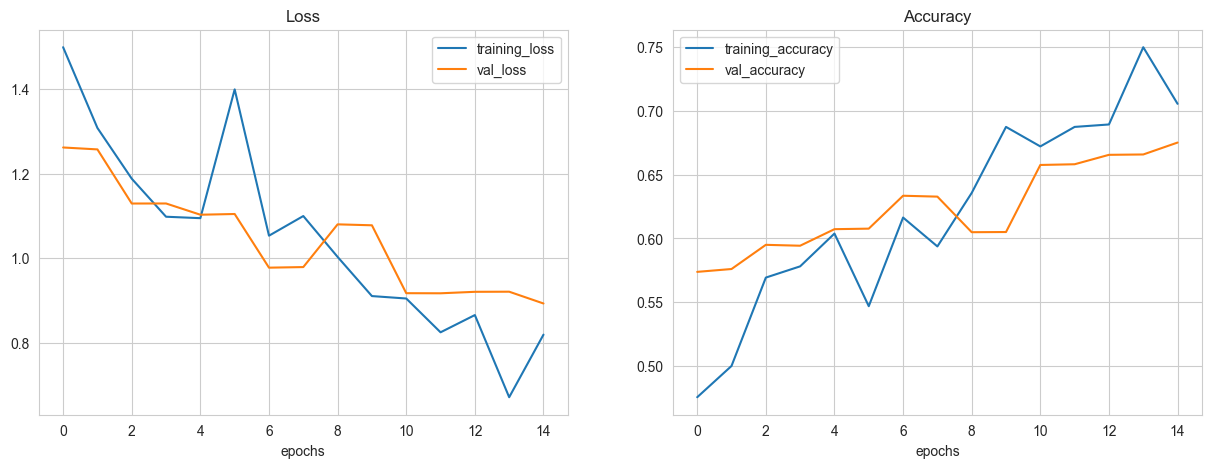

In [34]:
plot_curves(ResNet50V2_history)

In [35]:
ResNet50V2_Predictions = ResNet50V2_Model.predict(test_data)

# Choosing highest probalbilty class in every prediction 
ResNet50V2_Predictions = np.argmax(ResNet50V2_Predictions, axis=1)

113/113 ━━━━━━━━━━━━━━━━━━━━ 81s 709ms/step


Text(0.5, 1.0, 'ResNet50V2 Confusion Matrix')

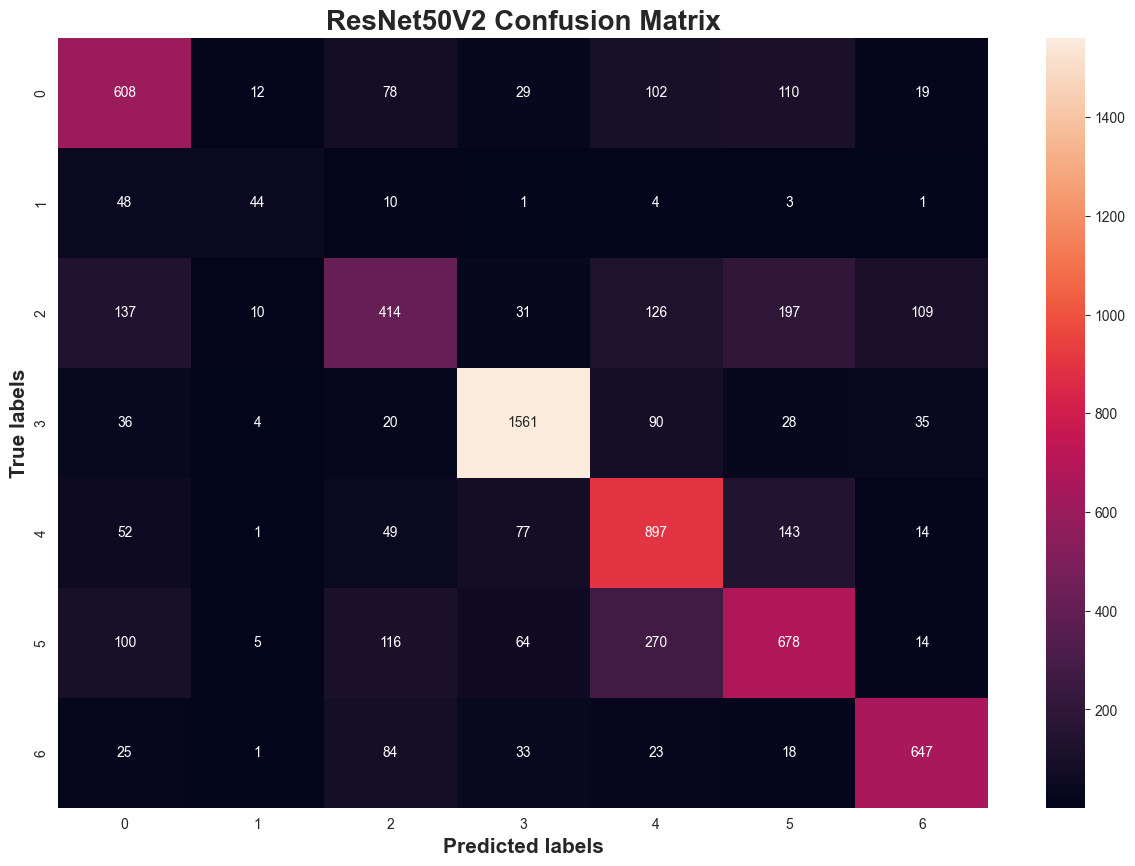

In [36]:
fig , ax= plt.subplots(figsize=(15,10))

cm=confusion_matrix(test_data.labels, ResNet50V2_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('ResNet50V2 Confusion Matrix', fontsize=20, fontweight='bold')

In [37]:
Emotion_Classes = ['Angry', 
                  'Disgust', 
                  'Fear', 
                  'Happy', 
                  'Neutral', 
                  'Sad', 
                  'Surprise']

In [38]:
# Shuffling Test Data to show diffrent classes
test_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
    )

test_generator = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size,
)

Found 7178 images belonging to 7 classes.


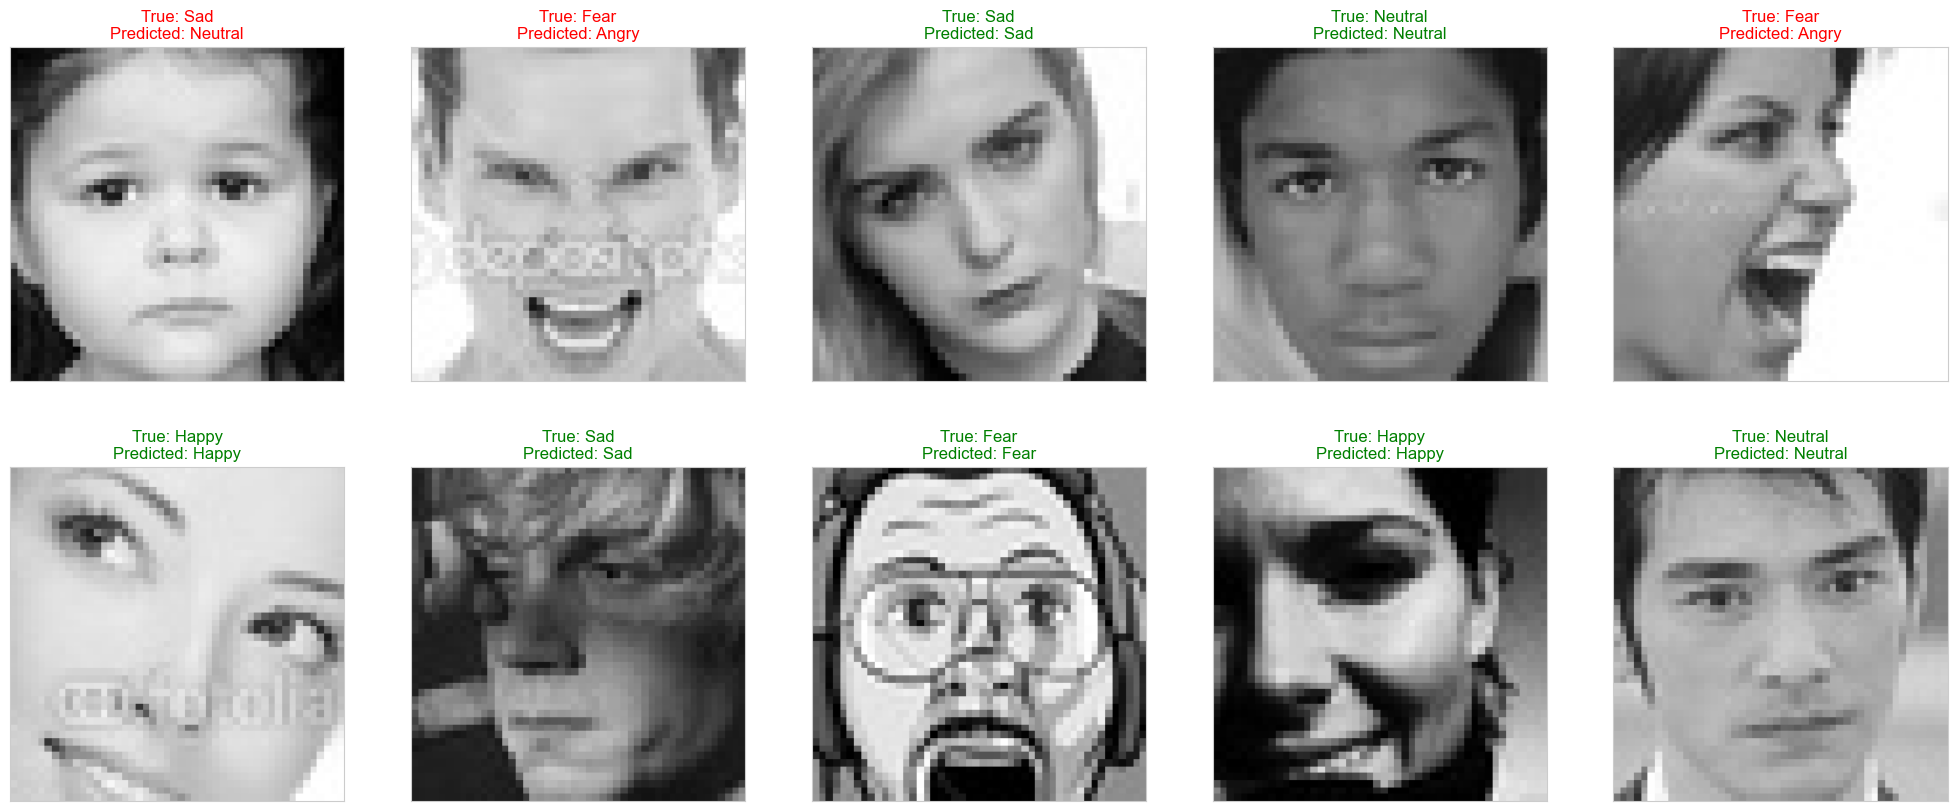

<Figure size 640x480 with 0 Axes>

In [39]:
# Display 10 random pictures from the dataset with their labels

Random_batch = np.random.randint(0, len(test_generator) - 1)

Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):

    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]

    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

    Model_Prediction = np.argmax(ResNet50V2_Model.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0))

    ax.imshow(Random_Img)

    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()


In [40]:
ResNet50V2_Model.save("ResNet50V2_Model.h5")

# Music Generation

In [ ]:
pip install pretty_midi

In [ ]:
import os
import glob
import pretty_midi

data_folder = '/kaggle/input/classical-music-midi'
midi_files = glob.glob(os.path.join(data_folder, '*.mid'))

# Process MIDI files
for midi_file in midi_files:
    # Load MIDI file
    midi_data = pretty_midi.PrettyMIDI(midi_file)
    
    # Process MIDI data as desired
    # For example:
    # Get piano roll representation of MIDI data
    piano_roll = midi_data.get_piano_roll(fs=100)
    
    # Do something with the piano roll data
    # For example:
    # Normalize the piano roll data to be between 0 and 1
    piano_roll = piano_roll / 127.0
    
    # Save the processed data as desired


In [ ]:
import os
import glob
import numpy as np
import pretty_midi

# Specify the path to the classical MIDI dataset
midi_dir = '/kaggle/input/classical-music-midi'

# Get a list of all the MIDI files in the dataset
midi_files = glob.glob(os.path.join(midi_dir, '*.mid'))

# Shuffle the list of MIDI files
np.random.shuffle(midi_files)

# Split the dataset into training and validation sets
split_ratio = 0.8
split_index = int(len(midi_files) * split_ratio)

train_files = midi_files[:split_index]
valid_files = midi_files[split_index:]


In [ ]:
!pip install music21

In [ ]:
import os
import music21

def get_notes(midi_file):
    """
    Convert MIDI file into a sequence of notes and chords
    
    Parameters:
    midi_file (str): path to the MIDI file
    
    Returns:
    notes (list): a list of music21.note.Note and music21.chord.Chord objects
    """
    
    notes = []
    
    # Load MIDI file into a stream object
    midi = music21.converter.parse(midi_file)
    
    # Get all the notes and chords from the MIDI file
    for element in midi.flat.notesAndRests:
        
        # Handle notes
        if isinstance(element, music21.note.Note):
            notes.append(str(element.pitch))
        
        # Handle chords
        elif isinstance(element, music21.chord.Chord):
            notes.append('.'.join(str(n) for n in element.normalOrder))
            
    return notes


def preprocess_midi_dataset(midi_dir, save_dir):
    """
    Preprocess the MIDI dataset by converting the MIDI files into a sequence of notes and chords
    
    Parameters:
    midi_dir (str): path to the directory containing MIDI files
    save_dir (str): path to the directory where preprocessed data will be saved
    """
    
    # Create the save directory if it does not exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # Get a list of all the MIDI files in the dataset
    midi_files = [os.path.join(midi_dir, f) for f in os.listdir(midi_dir) if f.endswith('.mid')]
    
    # Preprocess each MIDI file
    for i, midi_file in enumerate(midi_files):
        
        # Get the preprocessed notes
        notes = get_notes(midi_file)
        
        # Save the preprocessed notes to a file
        file_name = f'{i}.txt'
        save_path = os.path.join(save_dir, file_name)
        with open(save_path, 'w') as f:
            for note in notes:
                f.write(f'{note}\n')


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/kaggle/working/ResNet50V2_Model.h5')


In [ ]:
import numpy as np
import cv2
import pandas as pd

# Load FER-2013 dataset
fer_df = pd.read_csv('/kaggle/input/fer2013/train')

# Define emotion classes
emotion_classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Define desired image size for preprocessing
img_size = (48, 48)

# Initialize lists to store preprocessed data and emotion labels
preprocessed_data = []
emotion_labels = []

# Loop through each row in the FER-2013 dataset
for idx, row in fer_df.iterrows():
    # Extract the image and emotion label for the current row
    pixels = np.array(row['pixels'].split(), dtype=np.uint8).reshape(48, 48)
    emotion_label = emotion_classes.index(row['emotion'])
    
    # Only use data from the seven emotions we're interested in
    if emotion_label not in [0, 1, 2, 3, 4, 5, 6]:
        continue
    
    # Resize the image to the desired size
    resized_img = cv2.resize(pixels, img_size)
    
    # Normalize the pixel values to be between 0 and 1
    normalized_img = resized_img.astype('float32') / 255.0
    
    # Add the preprocessed image and emotion label to the lists
    preprocessed_data.append(normalized_img)
    emotion_labels.append(emotion_label)
    
# Convert lists to numpy arrays
preprocessed_data = np.array(preprocessed_data)
emotion_labels = np.array(emotion_labels)

# Save the preprocessed data and emotion labels as numpy arrays
np.save('preprocessed_data.npy', preprocessed_data)
np.save('emotion_labels.npy', emotion_labels)


In [ ]:
preprocessed_data = np.load('preprocessed_data.npy')
emotion_labels = np.load('emotion_labels.npy')